# Projeto de Classificação

## O que é Classificação?

Em problemas de classificação, o objetivo é categorizar dados em classes distintas. Dado um conjunto de características (ou features), o modelo é treinado para identificar a qual classe uma nova instância de dados pertence. Por exemplo, no contexto de análise de crédito, um modelo de classificação pode prever se um cliente é um "bom" ou "mau" pagador com base em suas características financeiras. Imagina também um e-mail que chegou na sua caixa de entrada; poderia ele ser categorizado como Spam ou não? 

# Outline
- [1 - Dependências](#1)
- [2 - Titanic Dataset](#2)
- [3 - Aquisição e Checagem dos Dados](#3)
- [4 - Preparação dos Dados e Leve Análise Exploratória](#4)
- [5 - Pré-Processamento](#5)
- [6 - Treinamento e Avaliação](#6)


<a id="1"></a>
## 1 - Dependências

In [1]:
# geral
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

<a id="2"></a>
## 2 - Titanic Dataset

O Titanic Dataset é um conjunto de dados amplamente conhecido, utilizado para resolver um problema de **classificação binária**: prever a sobrevivência dos passageiros do Titanic com base em diversas características pessoais. O objetivo é treinar um modelo capaz de identificar, dado um novo passageiro, se ele teria ou não sobrevivido ao naufrágio do Titanic em 1912. 

Este dataset foi criado a partir do desastre real do RMS Titanic, que afundou em sua viagem inaugural em 15 de abril de 1912, após colidir com um iceberg. Dos 2.224 passageiros e tripulantes a bordo, apenas 32% sobreviveram. A falta de botes salva-vidas para todos foi um dos principais motivos para a grande perda de vidas. Embora o fator sorte tenha desempenhado um papel, certos grupos de pessoas tinham mais chances de sobreviver, como mulheres, crianças e membros da classe alta.

### Definição do Problema

Nosso objetivo é usar o conjunto de dados de treino fornecido para construir um modelo que possa prever a sobrevivência dos passageiros presentes no conjunto de teste. A variável-alvo (ou variável dependente) é `Survived`, que indica se o passageiro sobreviveu (1) ou não (0). As demais variáveis serão tratadas como potenciais preditoras para essa classificação.

### Entendendo as Variáveis

Para entender melhor as variáveis do Titanic Dataset, vejamos algumas descrições detalhadas:

- **Survived**: Esta é a variável dependente ou alvo do nosso modelo. Ela indica a sobrevivência do passageiro, sendo 1 para sobreviventes e 0 para não sobreviventes. Trata-se de uma variável binária e nominal.
- **PassengerID** e **Ticket**: São identificadores únicos para cada passageiro, assumidos como aleatórios e sem impacto direto na sobrevivência.
- **Pclass**: Representa a classe do ticket, que é um dado ordinal e serve como um proxy para o status socioeconômico do passageiro. A classe 1 representa a classe alta, 2 a classe média e 3 a classe baixa.
- **Name**: Nome do passageiro, uma variável nominal. Ela pode ser usada para engenharia de atributos, derivando informações como gênero (a partir do título), tamanho da família (a partir do sobrenome), e status socioeconômico (a partir de títulos como "Dr." ou "Master").
- **Sex** e **Embarked**: Variáveis nominais que indicam o sexo do passageiro e o porto de embarque.
- **Age** e **Fare**: Variáveis quantitativas contínuas, representando a idade do passageiro e o preço do ticket, respectivamente.
- **SibSp** e **Parch**: Representam o número de irmãos/cônjuges e pais/filhos a bordo, respectivamente.
- **Cabin**: Indica a cabine do passageiro, uma variável nominal que pode ser usada para inferir a posição aproximada no navio e até mesmo o status socioeconômico, com base no nível do deck.

### Análise Inicial do Problema

O conjunto de dados de treino permite observar quais características (features) dos passageiros estão mais correlacionadas com a sobrevivência. O objetivo final é construir um modelo que consiga identificar corretamente as chances de sobrevivência com base nas características fornecidas para cada passageiro no conjunto de teste.

<a id="3"></a>
## 3 - Aquisição e Checagem dos Dados

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
labels = pd.read_csv("./data/gender_submission.csv")

test_df = test_df.join(labels.set_index('PassengerId'), on='PassengerId', rsuffix='_label')
combine = [train_df, test_df]

In [3]:
def visualize_info_data(combine):
    for data in combine:
        data.info()
        print("-"*30)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
visualize_info_data(combine)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

**Quais features são categóricas?**

Esses valores classificam as amostras em conjuntos de amostras semelhantes. Dentro das features categóricas, os valores são nominais, ordinais, proporcionais (ratio) ou intervalares? Entre outras coisas, isso nos ajuda a selecionar os gráficos apropriados para visualização.

**Categóricas:** Survived, Sex e Embarked. **Ordinal:** Pclass.

**Quais features são numéricas?**

Esses valores mudam de amostra para amostra. Dentro das features numéricas, os valores são discretos, contínuos ou baseados em séries temporais? Entre outras coisas, isso nos ajuda a selecionar os gráficos apropriados para visualização.

**Contínuas:** Age, Fare. **Discretas:** SibSp, Parch.

<a id="4"></a>
## 4 - Preparação dos Dados e Leve Análise Exploratória

Das informações dos Dataframes, nós conseguimos ver que há algumas colunas com valores **nulos**, seja no de treino, seja no de teste. Assim, vamos dar uma olhada nessas colunas.

In [6]:
print('Colunas de Treinamento com valores nulos:\n', train_df.isnull().sum())
print("-"*30)

print('Colunas de Teste com valores nulos:\n', test_df.isnull().sum())
print("-"*30)

Colunas de Treinamento com valores nulos:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Colunas de Teste com valores nulos:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64
------------------------------


#### Tratando valores nulos

Primeiramente, dê uma olhada na variável `Cabin`. Vamos dar uma olhada na porcentagem da quantidade de dados nulos em relação ao total.

In [7]:
print(f"Esta é a porcentagem de valores nulos na coluna 'Cabin' no conjunto de treino: {int(train_df.isnull().sum()['Cabin'])/len(train_df)*100:.2f}%")
print(f"Esta é a porcentagem de valores nulos na coluna 'Cabin' no conjunto de teste: {int(test_df.isnull().sum()['Cabin'])/len(test_df)*100:.2f}%")

Esta é a porcentagem de valores nulos na coluna 'Cabin' no conjunto de treino: 77.10%
Esta é a porcentagem de valores nulos na coluna 'Cabin' no conjunto de teste: 78.23%


É uma porcentagem realmente alta. Nesse sentido, os dados pertencentes a essa feature não agregarão valor. Com isso, vamos dropar dos datasets.

In [8]:
train_df.drop(['Cabin'], axis=1, inplace = True)
test_df.drop(['Cabin'], axis=1, inplace = True)
combine = [train_df, test_df]

In [9]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [11]:
print('Colunas de Treinamento com valores nulos:\n', train_df.isnull().sum())
print("-"*30)

print('Colunas de Teste com valores nulos:\n', test_df.isnull().sum())
print("-"*30)

Colunas de Treinamento com valores nulos:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
------------------------------
Colunas de Teste com valores nulos:
 PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Survived        0
dtype: int64
------------------------------


Agora, primeiramente no conjunto de treino, nós podemos observar que as colunas `Age` e `Embarked` possuem valores nulos, mas como a porcentagem em relação ao total é desprezível (praticamente) entendemos que elas podem, de fato, agregar valor para a predição.

Dado as características das features, faria sentido tomarmos a **média** para completarmos a coluna `Age` e utilizar a **moda** para completarmos a coluna `Embarked`.

In [12]:
# completando valores nulos de Age com média
train_df.fillna({'Age': train_df['Age'].median()}, inplace = True)

# completando valores nulos de Embarked com moda
train_df.fillna({'Embarked': train_df['Embarked'].mode()[0]}, inplace = True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


No que tange ao conjunto de teste, nós podemos observar que as colunas `Age` e `Fare` possuem valores nulos, mas como a porcentagem em relação ao total também é desprezível (praticamente), entendemos que elas podem, de fato, agregar valor para a predição.

Dado as características das features, faria sentido tomarmos a **média** para completarmos ambas as colunas.

In [14]:
# completando valores nulos de Age com média
test_df.fillna({'Age': test_df['Age'].median()}, inplace = True)

# completando valores nulos de Fare com média
test_df.fillna({'Fare': test_df['Fare'].median()}, inplace = True)

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


#### Seleção de features

Nesse caso, estarei selecionando features que agregam valor à predição justamente excluindo algumas que temos certeza que não impactarão este resultado final e outras para simplificação do modelo. Neste sentido, pensando em:

- **PassengerID** e **Ticket**: como já citados acima, são praticamente identificadores únicos, mas de certa forma aleatórios. Estes recursos, assim, são independentes do evento de sobrevivência.
- **Name**: pode ser usado para engenharia de features, mas vamos tratar a priori que também são independentes e únicos para cada indivíduo (para fins de simplificação).

Com isso, eu consigo agora excluí-los e ficar com as features restantes.

In [16]:
train_df.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace = True)
test_df.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace = True)

In [17]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [18]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

#### Algumas análises

Abaixo, você pode observar que há uma relevante correlação (> 0.5) para quando os passageiros eram da classe 1 (Pclass = 1) e Survived. Isso pode indicar que passageiros de `alta classe` possuiam mais chances de sobreviver.

In [19]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Também podemos perceber que grande parte dos passageiros que sobreviveram eram do sexo `feminino`.

In [20]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Quanto à idade dos passageiros, note uma coisa:

- Bebês (Idade <= 4) tiveram alta taxa de sobrevivência.
- Os passageiros mais velhos (Idade = 80) sobreviveram.
- Um grande número de jovens/adultos de 15 a 25 anos não sobreviveu.
- A maioria dos passageiros está na faixa etária de 15 a 35 anos.

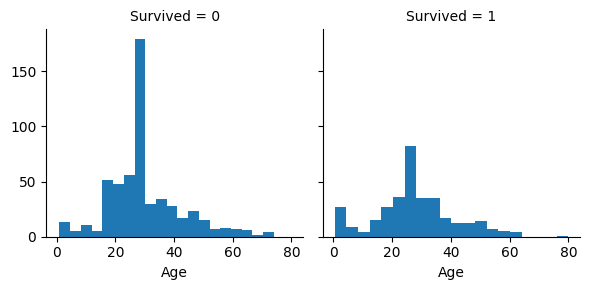

In [21]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Além disso, vamos dar uma olhada nas distribuições das variáveis numéricas que temos:

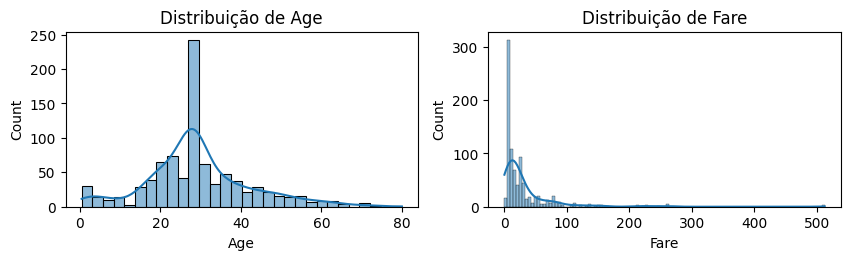

In [22]:
# Exemplo para duas variáveis
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribuição de Age')

plt.subplot(2, 2, 2)
sns.histplot(train_df['Fare'], kde=True)
plt.title('Distribuição de Fare')

plt.show()


É possível notar uma assimetria a direita para a coluna `Fare`. Há bons indícios de que teremos outliers, conforme abaixo, e isso poderá impactar na forma como passamos ao modelo. Apesar de ser bom remover outliers, não são quantidades significativas e os dados disponíveis para treinamento já não são muitos; podemos realizar uma tratagem no pré processamento, normalizando-os. No entanto, ao olhar para `Age`, a coluna está bem distribuída e assumimos que não vai demonstrar grandes variações de valores que afetem o treinamento do modelo.

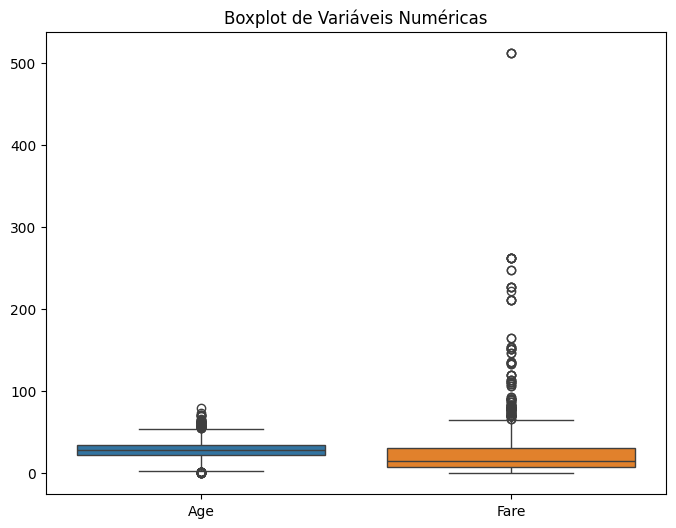

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df[['Age', 'Fare']])
plt.title('Boxplot de Variáveis Numéricas')
plt.show()


<a id="5"></a>
## 5 - Pré-Processamento

#### Tomando os dummies para as variáveis categóricas



### Entendendo as Variáveis

Para entender melhor as variáveis do Titanic Dataset, vejamos algumas descrições detalhadas:

- **Survived**: Esta é a variável dependente ou alvo do nosso modelo. Ela indica a sobrevivência do passageiro, sendo 1 para sobreviventes e 0 para não sobreviventes. Trata-se de uma variável binária e nominal.
- **PassengerID** e **Ticket**: São identificadores únicos para cada passageiro, assumidos como aleatórios e sem impacto direto na sobrevivência.
- **Pclass**: Representa a classe do ticket, que é um dado ordinal e serve como um proxy para o status socioeconômico do passageiro. A classe 1 representa a classe alta, 2 a classe média e 3 a classe baixa.
- **Name**: Nome do passageiro, uma variável nominal. Ela pode ser usada para engenharia de atributos, derivando informações como gênero (a partir do título), tamanho da família (a partir do sobrenome), e status socioeconômico (a partir de títulos como "Dr." ou "Master").
- **Sex** e **Embarked**: Variáveis nominais que indicam o sexo do passageiro e o porto de embarque.
- **Age** e **Fare**: Variáveis quantitativas contínuas, representando a idade do passageiro e o preço do ticket, respectivamente.
- **SibSp** e **Parch**: Representam o número de irmãos/cônjuges e pais/filhos a bordo, respectivamente.
- **Cabin**: Indica a cabine do passageiro, uma variável nominal que pode ser usada para inferir a posição aproximada no navio e até mesmo o status socioeconômico, com base no nível do deck.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

# Definições das colunas
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']
discrete_features = ['SibSp', 'Parch']

# Transformações
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

discrete_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    # Pode escalar também se quiser:
    ('scaler', StandardScaler())
])

# Pipeline combinada
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('disc', discrete_transformer, discrete_features)
    ]
)

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("Survived", axis=1)
Y_test  = test_df["Survived"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((891, 7), (891,), (418, 7), (418,))

<a id="6"></a>
## 6 - Treinamento e Avaliação

### O que é uma Regressão Logística?

A regressão logística é um modelo estatístico amplamente utilizado para resolver problemas de **classificação binária**. Diferentemente da **regressão linear**, cujo objetivo é prever um valor contínuo, a regressão logística busca prever a probabilidade de uma instância pertencer a uma determinada classe (por exemplo, 0 ou 1, sobrevivência ou não sobrevivência). 

Para isso, a regressão logística utiliza uma função não-linear chamada **sigmoide**, que mapeia valores reais para um intervalo entre 0 e 1, tornando-a ideal para problemas de classificação.

#### A Função Sigmoide

A função sigmoide é definida como:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

onde $z$ é o valor linear da combinação dos atributos e dos pesos, dado por:

$$
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \vec{X} \cdot \vec{\theta}
$$

A função sigmoide transforma o valor linear $z$ em uma probabilidade, $g(z)$, que varia entre 0 e 1. Podemos interpretar essa probabilidade como a chance da instância pertencer à classe 1.

Ao treinar um modelo de regressão logística, precisamos de uma métrica que indique o quão bem o modelo se ajusta aos dados. Para isso, utilizamos a **função de perda** (loss function) para medir o erro de uma única amostra, e a **função de custo** (cost function) para calcular o erro médio de todo o conjunto de dados.

### Função de Perda (Loss Function)

A função de perda mede o erro de predição para uma única instância. No caso da regressão logística, a perda $ L(\theta; x^{(i)}, y^{(i)}) $ é dada pela **Binary Cross-Entropy** para cada exemplo $ i $:

$$
L(\theta; x^{(i)}, y^{(i)}) = - \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

onde:
- $ h_\theta(x^{(i)}) $ é a previsão do modelo para a amostra $ i $, dada pela função sigmoide $ g(z) $,
- $ y^{(i)} $ é o valor verdadeiro da amostra $ i $ (0 ou 1).

Essa função de perda é configurada para penalizar previsões incorretas de maneira assimétrica, de forma que a perda é maior quando a predição está mais distante do valor verdadeiro.

### Função de Custo (Cost Function)

A função de custo para a regressão logística, denotada por $ J(\theta) $, é a média das perdas para todas as amostras no conjunto de dados. Isso nos dá uma medida geral do desempenho do modelo em relação a todo o conjunto de treino. Ela é definida como:

$$
J(\vec{\theta}) = \frac{1}{m} \sum_{i=1}^{m} L(\theta; x^{(i)}, y^{(i)}) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

onde:
- $ m $ é o número total de amostras no conjunto de treino.

A função de custo $ J(\theta) $ representa o erro médio do modelo. Durante o treinamento, queremos encontrar os valores dos parâmetros $ \theta $ que minimizam essa função de custo, ou seja, que resultam no menor erro médio de previsão.

### Intuição sobre a Função de Perda e a Função de Custo

- **Função de Perda**: Calcula o erro para uma única amostra. Quanto maior o erro, maior será a perda associada a essa amostra.
- **Função de Custo**: Calcula o erro médio para todas as amostras no conjunto de treino. Minimizar essa função implica ajustar os parâmetros $ \theta $ para que o modelo produza previsões mais precisas para o conjunto de dados como um todo.

Assim, o objetivo do treinamento é **minimizar a função de custo** $ J(\theta) $ para encontrar os parâmetros ótimos que reduzem a perda média. Isso é feito com algoritmos de otimização, como o **Gradiente Descendente**.

#### Gradiente e Otimização

Para encontrar os parâmetros $ \vec{\theta} $ que minimizam a função de custo $ J(\vec{\theta}) $, usamos o **Gradiente Descendente**. O gradiente da função de custo em relação a cada parâmetro $ \theta_j $ é dado por:

$$
\frac{\partial J(\vec{\theta})}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

Com o gradiente, atualizamos os parâmetros $ \vec{\theta} $ de acordo com a seguinte regra:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\vec{\theta})}{\partial \theta_j}
$$

onde $ \alpha $ é a **taxa de aprendizado** (learning rate) que controla o tamanho do passo em cada iteração.

#### Limite de Decisão (Decision Boundary)

Após o treinamento, o modelo calcula uma probabilidade para cada instância. Para tomar decisões de classificação, utilizamos um **limite de decisão**. No caso binário, se a probabilidade prevista $ h_\theta(x) $ for maior ou igual a 0.5, classificamos a instância como classe 1. Caso contrário, classificamos como classe 0. Assim:

$$
\hat{y} = 
\begin{cases} 
1 & \text{se } h_\theta(x) \geq 0.5 \\
0 & \text{se } h_\theta(x) < 0.5 
\end{cases}
$$




In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Monta pipeline completa com modelo
model = make_pipeline(preprocessor, LogisticRegression(solver='liblinear')) #RandomForestClassifier(n_estimators=100, random_state=42))

# Treina
model.fit(X_train, Y_train)

# Prediz
Y_pred = model.predict(X_test)

              Not Survived  Survived
Not Survived           254        12
Survived                10       142
------------------------------


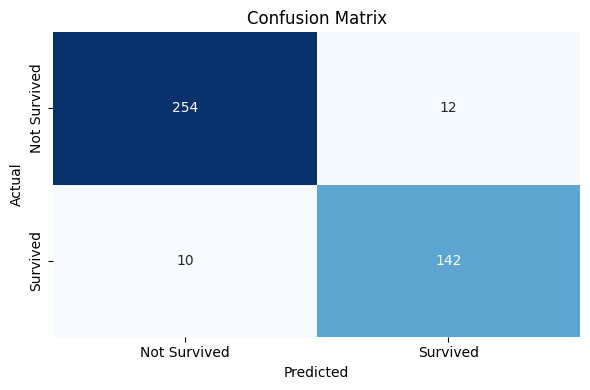

In [26]:
# Confunsion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Criando a matriz de confusão
cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Not Survived', 'Survived'], columns=['Not Survived', 'Survived'])

# Exibindo a matriz no terminal
print(cm_df)
print("-"*30)

# Visualizando com seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Métricas 

### 🎯 Avaliação de Modelos de Classificação Binária

Ao treinar um modelo de classificação binária, é essencial avaliar sua performance de maneira completa. Para isso, utilizamos métricas baseadas na **matriz de confusão**, que nos permite entender como o modelo está classificando exemplos positivos e negativos.

### 📌 Matriz de Confusão

A matriz de confusão é uma tabela que resume as predições feitas por um modelo de classificação:

|                   | Previsto Positivo | Previsto Negativo |
|-------------------|-------------------|-------------------|
| **Real Positivo** | Verdadeiro Positivo (TP) | Falso Negativo (FN) |
| **Real Negativo** | Falso Positivo (FP) | Verdadeiro Negativo (TN) |

Esses quatro valores são a base para as principais métricas:

### 📐 Métricas Derivadas da Matriz de Confusão

- **Acurácia (Accuracy)**: Proporção de previsões corretas.
  $$
  \text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precisão (Precision)**: Entre as predições positivas, quantas realmente são positivas?
  $$
  \text{Precisão} = \frac{TP}{TP + FP}
  $$

- **Revocação / Sensibilidade (Recall / Sensitivity)**: Entre os exemplos positivos reais, quantos foram corretamente classificados?
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-Score**: Média harmônica entre precisão e recall.
  $$
  F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}}
  $$


Estas métricas devem ser analisadas em conjunto para entender o desempenho real do modelo, especialmente em datasets desbalanceados.


In [27]:
report = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not Survived       0.96      0.95      0.96       266
    Survived       0.92      0.93      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.95      0.95       418



In [28]:
report = classification_report(Y_train, model.predict(X_train), target_names=['Not Survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not Survived       0.82      0.87      0.85       549
    Survived       0.77      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.81      0.80       891

